In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
#import cartopy.crs as ccrs

from salishsea_tools import visualisations as vis
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

In [2]:


# def plot_thalweg(ax, T_lon, T_lat):
#     lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
#     lines = lines.astype(int)

#     thalweg_lon = T_lon[lines[:,0],lines[:,1]]
#     thalweg_lat = T_lat[lines[:,0],lines[:,1]]
#     ax.plot(thalweg_lon, thalweg_lat, 'r')

In [3]:
#open bathymetry grid
grid = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
meshmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))
BR3_DIC_fullyear_mean = pickle.load(open('../pkls/BR3_DIC_fullyear_mean.pkl', 'rb'))
BR3_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb')) 
#BR3_DIC_fullyear_mean

In [4]:
flag ='../pkls/BR3_flagellates_means_inletsIN.pkl'
diat ='../pkls/BR3_diatoms_means_inletsIN.pkl'
cili ='../pkls/BR3_ciliates_means_inletsIN.pkl'
csd = '../pkls/cellsize_alg2.pkl'

flag_mas = pickle.load(open(flag, 'rb'))  
diat_mas = pickle.load(open(diat, 'rb'))
cili_mas = pickle.load(open(cili, 'rb'))

mmask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (mmask['e3t_1d'][:])

mask_broad = np.zeros([40,365])

for i in range(0,365):
    mask_broad[:,i] = depths


flag_mas_mm_m2 = np.nansum((mask_broad*flag_mas),axis = 0)
diat_mas_mm_m2 = np.nansum((mask_broad*diat_mas),axis = 0)
cili_mas_mm_m2 = np.nansum((mask_broad*cili_mas),axis = 0)

In [16]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
PI5_var = pickle.load(open('../pkls/PI5_DIC_means_inletsIN.pkl' , 'rb')) 
PI5_var[PI5_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run
 
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI5_var_jdf = pickle.load(open('../pkls/PI5_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI5_var_cs = pickle.load(open('../pkls/PI5_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI5_var_ns = pickle.load(open('../pkls/PI5_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI5_var_haro = pickle.load(open('../pkls/PI5_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
PI5_var_jdf2 = pickle.load(open('../pkls/PI5_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
PI5_var_cs2 = pickle.load(open('../pkls/PI5_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
PI5_var_ns2 = pickle.load(open('../pkls/PI5_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))
PI5_var_haro2 = pickle.load(open('../pkls/PI5_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
PI5_var_jdf3 = pickle.load(open('../pkls/PI5_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
PI5_var_cs3 = pickle.load(open('../pkls/PI5_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
PI5_var_ns3 = pickle.load(open('../pkls/PI5_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))
PI5_var_haro3 = pickle.load(open('../pkls/PI5_DIC_means_haro3_BOX.pkl','rb'))

BR3_dp = np.nanmean(BR3_var, axis =1)
PI5_dp = np.nanmean(PI5_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI5_jdf_dp = np.nanmean(PI5_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI5_cs_dp = np.nanmean(PI5_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI5_ns_dp = np.nanmean(PI5_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI5_haro_dp = np.nanmean(PI5_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI5_jdf2_dp = np.nanmean(PI5_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI5_cs2_dp = np.nanmean(PI5_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI5_ns2_dp = np.nanmean(PI5_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI5_haro2_dp = np.nanmean(PI5_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI5_jdf3_dp = np.nanmean(PI5_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI5_cs3_dp = np.nanmean(PI5_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI5_ns3_dp = np.nanmean(PI5_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI5_haro3_dp = np.nanmean(PI5_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   


In [17]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
PI6_var = pickle.load(open('../pkls/PI6_DIC_means_inletsIN.pkl' , 'rb')) 
PI6_var[PI6_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run
 
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI6_var_jdf = pickle.load(open('../pkls/PI6_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI6_var_cs = pickle.load(open('../pkls/PI6_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI6_var_ns = pickle.load(open('../pkls/PI6_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI6_var_haro = pickle.load(open('../pkls/PI6_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
PI6_var_jdf2 = pickle.load(open('../pkls/PI6_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
PI6_var_cs2 = pickle.load(open('../pkls/PI6_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
PI6_var_ns2 = pickle.load(open('../pkls/PI6_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))
PI6_var_haro2 = pickle.load(open('../pkls/PI6_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
PI6_var_jdf3 = pickle.load(open('../pkls/PI6_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
PI6_var_cs3 = pickle.load(open('../pkls/PI6_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
PI6_var_ns3 = pickle.load(open('../pkls/PI6_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))
PI6_var_haro3 = pickle.load(open('../pkls/PI6_DIC_means_haro3_BOX.pkl','rb'))

BR3_dp = np.nanmean(BR3_var, axis =1)
PI6_dp = np.nanmean(PI6_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI6_jdf_dp = np.nanmean(PI6_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI6_cs_dp = np.nanmean(PI6_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI6_ns_dp = np.nanmean(PI6_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI6_haro_dp = np.nanmean(PI6_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI6_jdf2_dp = np.nanmean(PI6_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI6_cs2_dp = np.nanmean(PI6_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI6_ns2_dp = np.nanmean(PI6_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI6_haro2_dp = np.nanmean(PI6_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI6_jdf3_dp = np.nanmean(PI6_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI6_cs3_dp = np.nanmean(PI6_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI6_ns3_dp = np.nanmean(PI6_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI6_haro3_dp = np.nanmean(PI6_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   


In [18]:
#extract means for BR1-BR3, get fraser discharge
#var
BR1_var = pickle.load(open('../pkls/BR1_DIC_means_inletsIN.pkl' , 'rb')) 
BR2_var = pickle.load(open('../pkls/BR2_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 

PI1_var = pickle.load(open('../pkls/PI1_DIC_means_inletsIN.pkl' , 'rb')) 
PI2_var = pickle.load(open('../pkls/PI2_DIC_means_inletsIN.pkl' , 'rb')) 
PI3rr_var = pickle.load(open('../pkls/PI3rr_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl' , 'rb')) 
PI4_var[PI4_var == 0] = np.nan
PI7_var = pickle.load(open('../pkls/PI7_DIC_means_inletsIN.pkl' , 'rb')) 
PI7_var[PI7_var == 0] = np.nan
Fraser_discharge = pickle.load(open('../pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  



mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]
days_in = np.arange(1,366,1)
#make a long 3-year dataset to be able to compare spinup progress for BR run
 
BR3_var_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
PI7_var_jdf = pickle.load(open('../pkls/PI7_DIC_means_jdf_BOX.pkl','rb'))
BR3_var_cs = pickle.load(open('../pkls/BR3_DIC_means_cs_BOX.pkl','rb'))
PI7_var_cs = pickle.load(open('../pkls/PI7_DIC_means_cs_BOX.pkl','rb'))
BR3_var_ns = pickle.load(open('../pkls/BR3_DIC_means_ns_BOX.pkl','rb'))
PI7_var_ns = pickle.load(open('../pkls/PI7_DIC_means_ns_BOX.pkl','rb'))
BR3_var_haro = pickle.load(open('../pkls/BR3_DIC_means_haro_BOX.pkl','rb'))
PI7_var_haro = pickle.load(open('../pkls/PI7_DIC_means_haro_BOX.pkl','rb'))

BR3_var_jdf2 = pickle.load(open('../pkls/BR3_DIC_means_jdf2_BOX.pkl','rb'))
PI7_var_jdf2 = pickle.load(open('../pkls/PI7_DIC_means_jdf2_BOX.pkl','rb'))
BR3_var_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
PI7_var_cs2 = pickle.load(open('../pkls/PI7_DIC_means_cs2_BOX.pkl','rb'))
BR3_var_ns2 = pickle.load(open('../pkls/BR3_DIC_means_ns2_BOX.pkl','rb'))
PI7_var_ns2 = pickle.load(open('../pkls/PI7_DIC_means_ns2_BOX.pkl','rb'))
BR3_var_haro2 = pickle.load(open('../pkls/BR3_DIC_means_haro2_BOX.pkl','rb'))
PI7_var_haro2 = pickle.load(open('../pkls/PI7_DIC_means_haro2_BOX.pkl','rb'))

BR3_var_jdf3 = pickle.load(open('../pkls/BR3_DIC_means_jdf3_BOX.pkl','rb'))
PI7_var_jdf3 = pickle.load(open('../pkls/PI7_DIC_means_jdf3_BOX.pkl','rb'))
BR3_var_cs3 = pickle.load(open('../pkls/BR3_DIC_means_cs3_BOX.pkl','rb'))
PI7_var_cs3 = pickle.load(open('../pkls/PI7_DIC_means_cs3_BOX.pkl','rb'))
BR3_var_ns3 = pickle.load(open('../pkls/BR3_DIC_means_ns3_BOX.pkl','rb'))
PI7_var_ns3 = pickle.load(open('../pkls/PI7_DIC_means_ns3_BOX.pkl','rb'))
BR3_var_haro3 = pickle.load(open('../pkls/BR3_DIC_means_haro3_BOX.pkl','rb'))
PI7_var_haro3 = pickle.load(open('../pkls/PI7_DIC_means_haro3_BOX.pkl','rb'))

BR3_dp = np.nanmean(BR3_var, axis =1)
PI7_dp = np.nanmean(PI7_var, axis =1)

BR3_jdf_dp = np.nanmean(BR3_var_jdf, axis =1)
PI7_jdf_dp = np.nanmean(PI7_var_jdf, axis =1)
BR3_cs_dp = np.nanmean(BR3_var_cs, axis =1)
PI7_cs_dp = np.nanmean(PI7_var_cs, axis =1)
BR3_ns_dp = np.nanmean(BR3_var_ns, axis =1)
PI7_ns_dp = np.nanmean(PI7_var_ns, axis =1)
BR3_haro_dp = np.nanmean(BR3_var_haro, axis =1)
PI7_haro_dp = np.nanmean(PI7_var_haro, axis =1)

BR3_jdf2_dp = np.nanmean(BR3_var_jdf2, axis =1)
PI7_jdf2_dp = np.nanmean(PI7_var_jdf2, axis =1)
BR3_cs2_dp = np.nanmean(BR3_var_cs2, axis =1)
PI7_cs2_dp = np.nanmean(PI7_var_cs2, axis =1)
BR3_ns2_dp = np.nanmean(BR3_var_ns2, axis =1)
PI7_ns2_dp = np.nanmean(PI7_var_ns2, axis =1)
BR3_haro2_dp = np.nanmean(BR3_var_haro2, axis =1)
PI7_haro2_dp = np.nanmean(PI7_var_haro2, axis =1)

BR3_jdf3_dp = np.nanmean(BR3_var_jdf3, axis =1)
PI7_jdf3_dp = np.nanmean(PI7_var_jdf3, axis =1)
BR3_cs3_dp = np.nanmean(BR3_var_cs3, axis =1)
PI7_cs3_dp = np.nanmean(PI7_var_cs3, axis =1)
BR3_ns3_dp = np.nanmean(BR3_var_ns3, axis =1)
PI7_ns3_dp = np.nanmean(PI7_var_ns3, axis =1)
BR3_haro3_dp = np.nanmean(BR3_var_haro3, axis =1)
PI7_haro3_dp = np.nanmean(PI7_var_haro3, axis =1)

depths = mesh['gdept_1d'][:]
zdepth = depths[0]   


## stations etc

In [19]:
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')

nav_lon = (grid['nav_lon'][:])
nav_lat = (grid['nav_lat'][:])
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

haro_x = 230; haro_y = 310; haro_col = 'tomato'
haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


ns_x = 160; ns_y = 680; ns_col = 'olive'
ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


xs_list = [jdf_x, jdf2_x, jdf3_x,cs_x, cs2_x, cs3_x,haro_x, haro2_x, haro3_x,ns_x, ns2_x, ns3_x]
ys_list = [jdf_y, jdf2_y, jdf3_y,cs_y, cs2_y, cs3_y,haro_y, haro2_y, haro3_y,ns_y, ns2_y, ns3_y]
cols_list = ['teal', 'mediumaquamarine',  'lightseagreen',  'royalblue', 'navy',\
 'dodgerblue', 'tomato','firebrick','indianred',  'olive', 'yellowgreen', 'palegoldenrod']

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)

lines = np.loadtxt('/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt', delimiter=" ", unpack=False)
lines = lines.astype(int)
thal_lon = np.zeros(1533)
thal_lat = np.zeros(1533)

for i in range(0,len(thal_lon)):
    ty = lines[i,0]
    tx = lines[i,1]
    thal_lon[i] = (nav_lon[ty,tx])
    thal_lat[i] = (nav_lat[ty,tx])


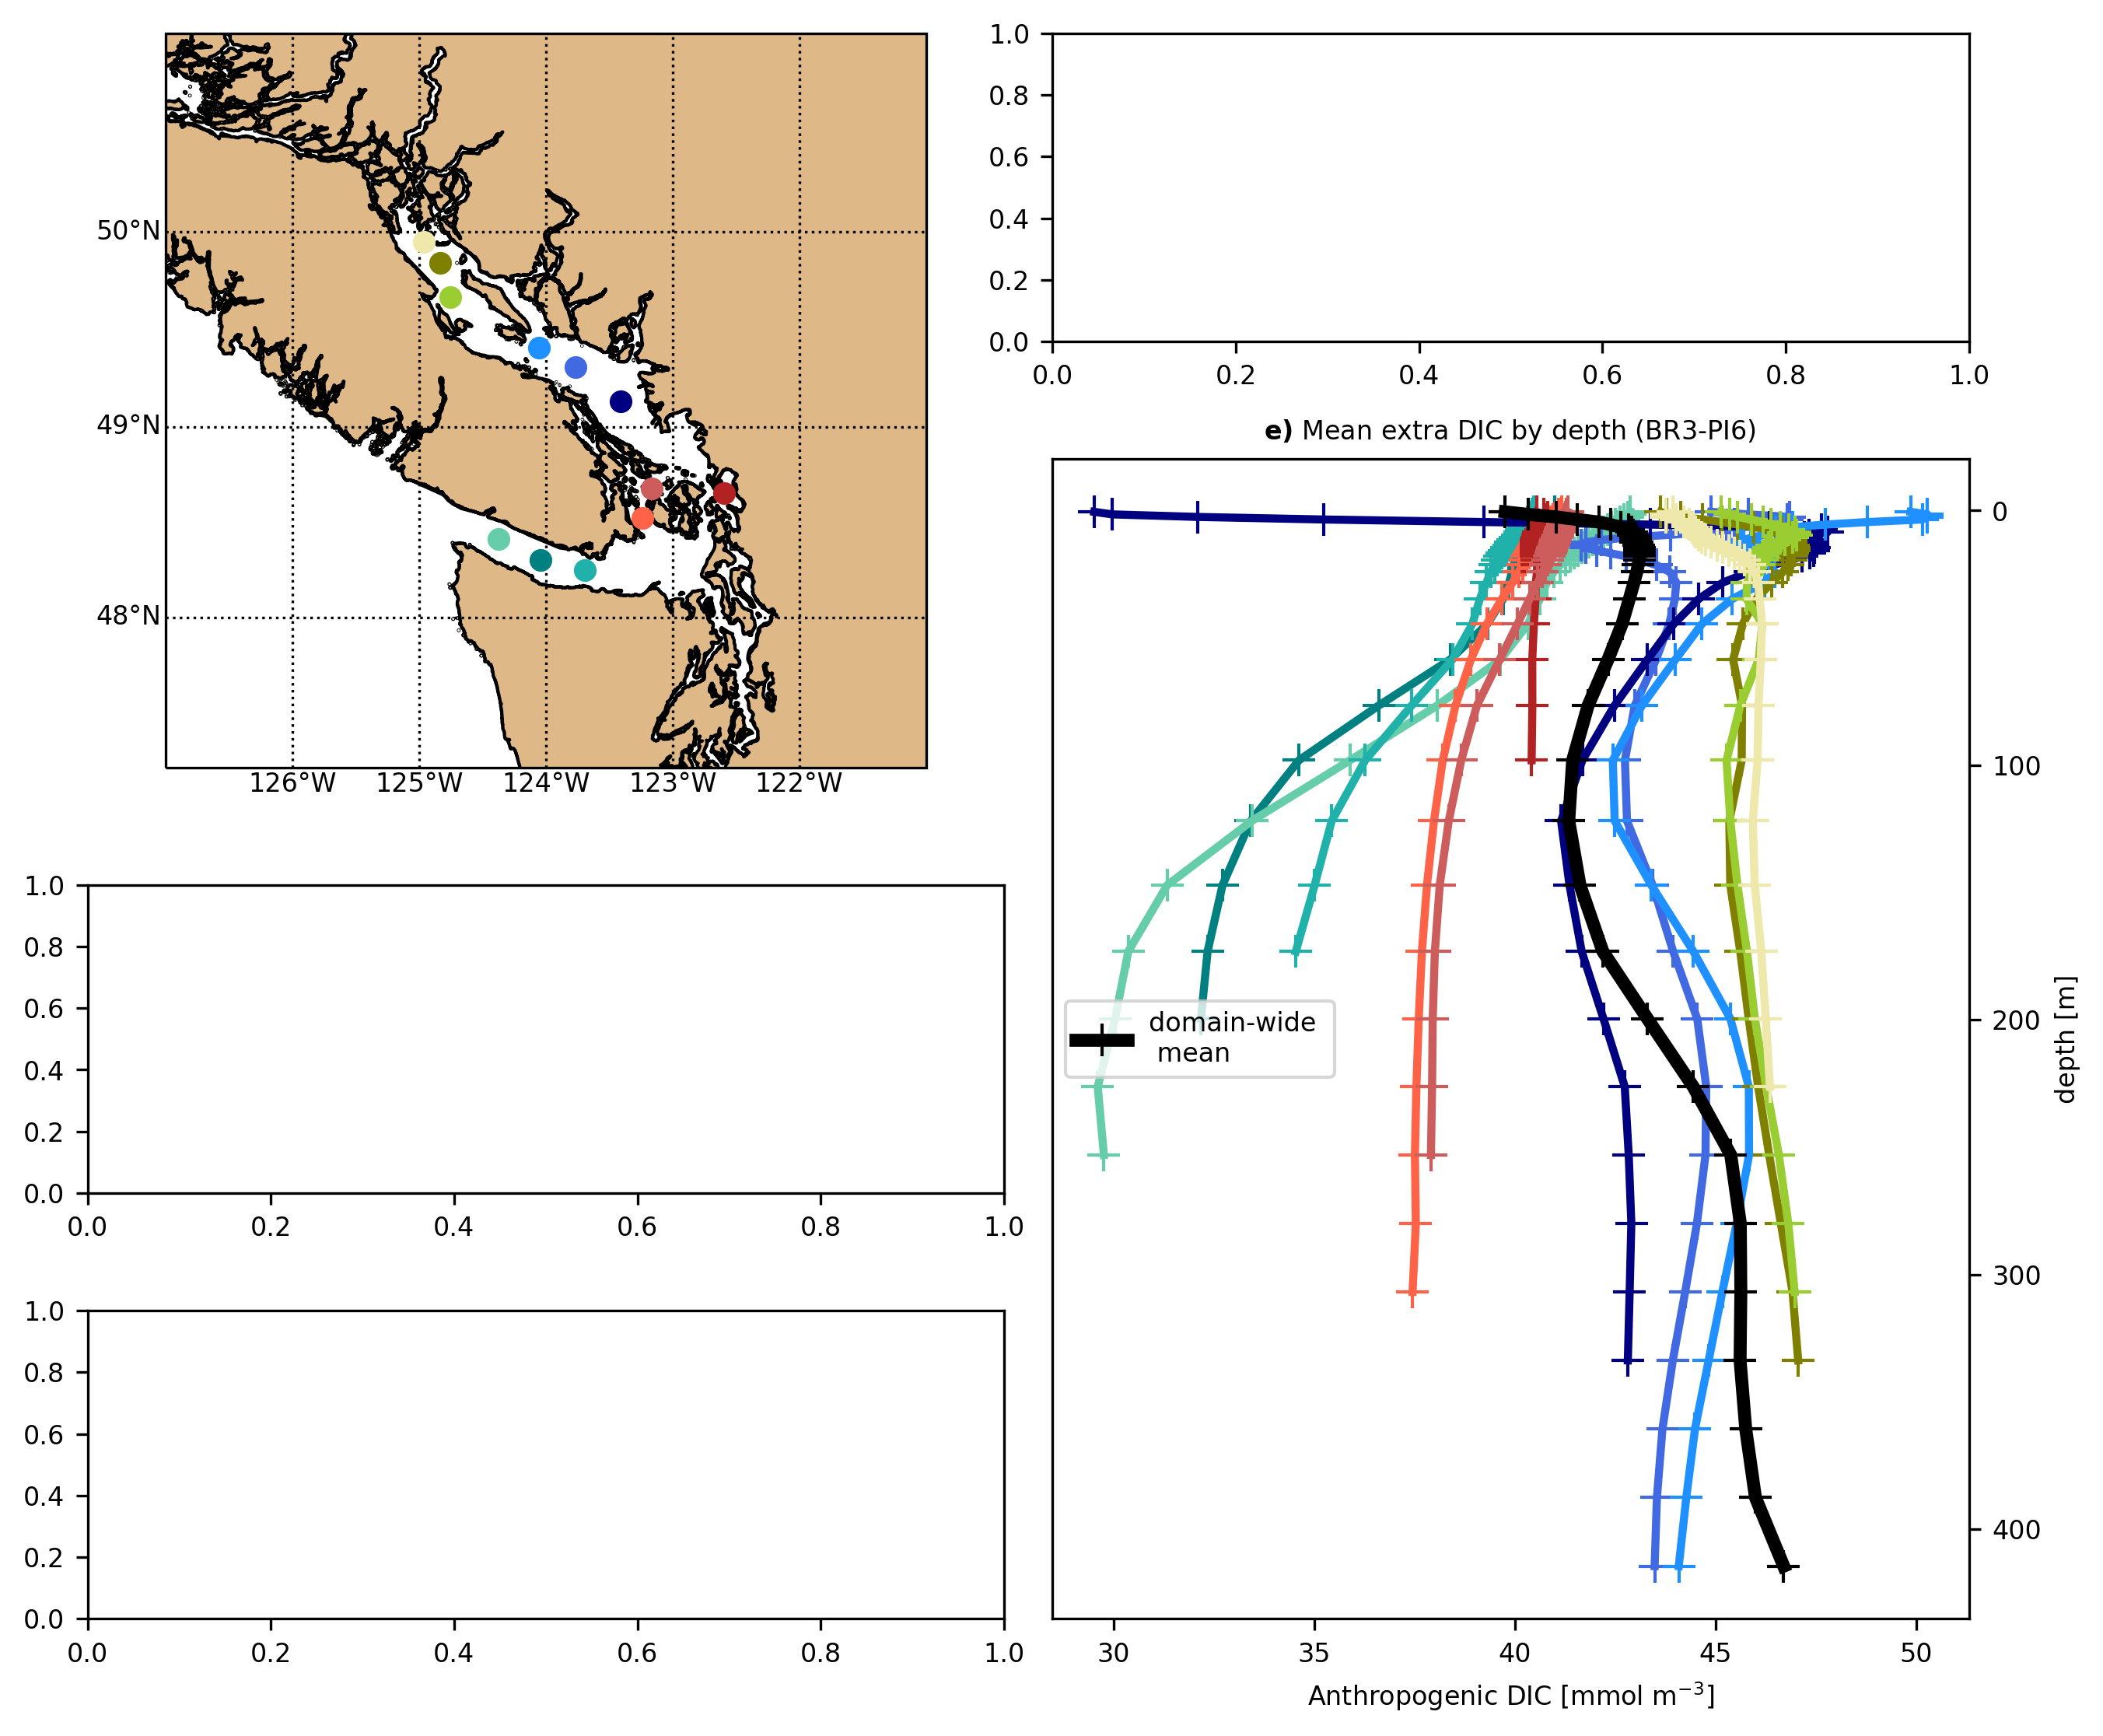

In [20]:
ms = 6

tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rcParams['font.size'] = 8

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

############# ax1 
#domain plot - BR run summer average
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
xlim, ylim = [-128, -121.5], [47.2, 51.0]
ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

#Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

#ax.plot(-124,50, marker = 'o', markersize = 68, color = 'teal', zorder = 10)

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)
    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())
#ax.plot(-124,50, 'bo', markersize=7, transform=ccrs.Geodetic())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.7, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='mean summer salinity [g/kg]', ticks = tticks)




# # Draw coastline
# ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

# #Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# # Add gridlines
# xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
# gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
# gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.6, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='Depth [m]', ticks = tticks)

#############################




ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
# depth = tmesh['e3t_0'][0,:,250,250]; shift = 2; seg = 45; lw = 1
# tcm = cm.dense
# depths = tmesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
#     td = zdepths[i]
#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(td))+' m', linewidth = lw+1)
# #ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(bbox_to_anchor=[1, 1.1], fontsize = 8, ncol = 1)
# plt.xlim([0,365*1])
# plt.ylim([1440,2180])
# plt.grid()
# #ax1.set_xlabel('day of year', fontsize = 8)
# ax1.set_xticks([0,50,100,150,200,250,300,350])
# ax1.set_ylabel('mmol m$^{-3}$', fontsize = 8)
# #ax1.set_title(r'$\bf{a)}$ Model domain showing analyzed stations',y=1.1)
# ax1.set_title(r'$\bf{b)}$ By-layer domain mean DIC concentration', fontsize = 8)

#bio, river
ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 2, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 2)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs); ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('mmol N m$^{-2}$', fontsize = fs); ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('m$^3$ s$^{-1}$', fontsize = fs)
# ax2.set_xticks([0,50,100,150,200,250,300,350])
# plt.xlim([0,365]); ax2b.set_ylim([0,130])
# ax2.set_title(r'$\bf{c)}$ Freshwater discharge and phytoplankton biomass', fontsize = 8)

### thalweg
ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)
# cbar = \
# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(1900, 2200, 20), cmap = cm.matter)
# ax3.set_title(r'$\bf{d)}$ Year Average DIC (present-day)',fontsize = 8)
# ax3.set_xlabel('Distance along thalweg [km]',fontsize = 8)
# cbar.ax.tick_params(labelsize=8) 
# cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = 8)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# #ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
# ax3.tick_params(axis='both', which='major', labelsize=8)
# ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')

# depth profile
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

ax3.plot(BR3_jdf_dp-PI6_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI6_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI6_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI6_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI6_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI6_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI6_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI6_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI6_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI6_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI6_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI6_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI6_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

#ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (BR3-PI6) ', fontsize = 8)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'center left', fontsize = fs)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
plt.tight_layout()
fig.savefig('MF_DOMAIN_BR3-PI6.jpg')
# 

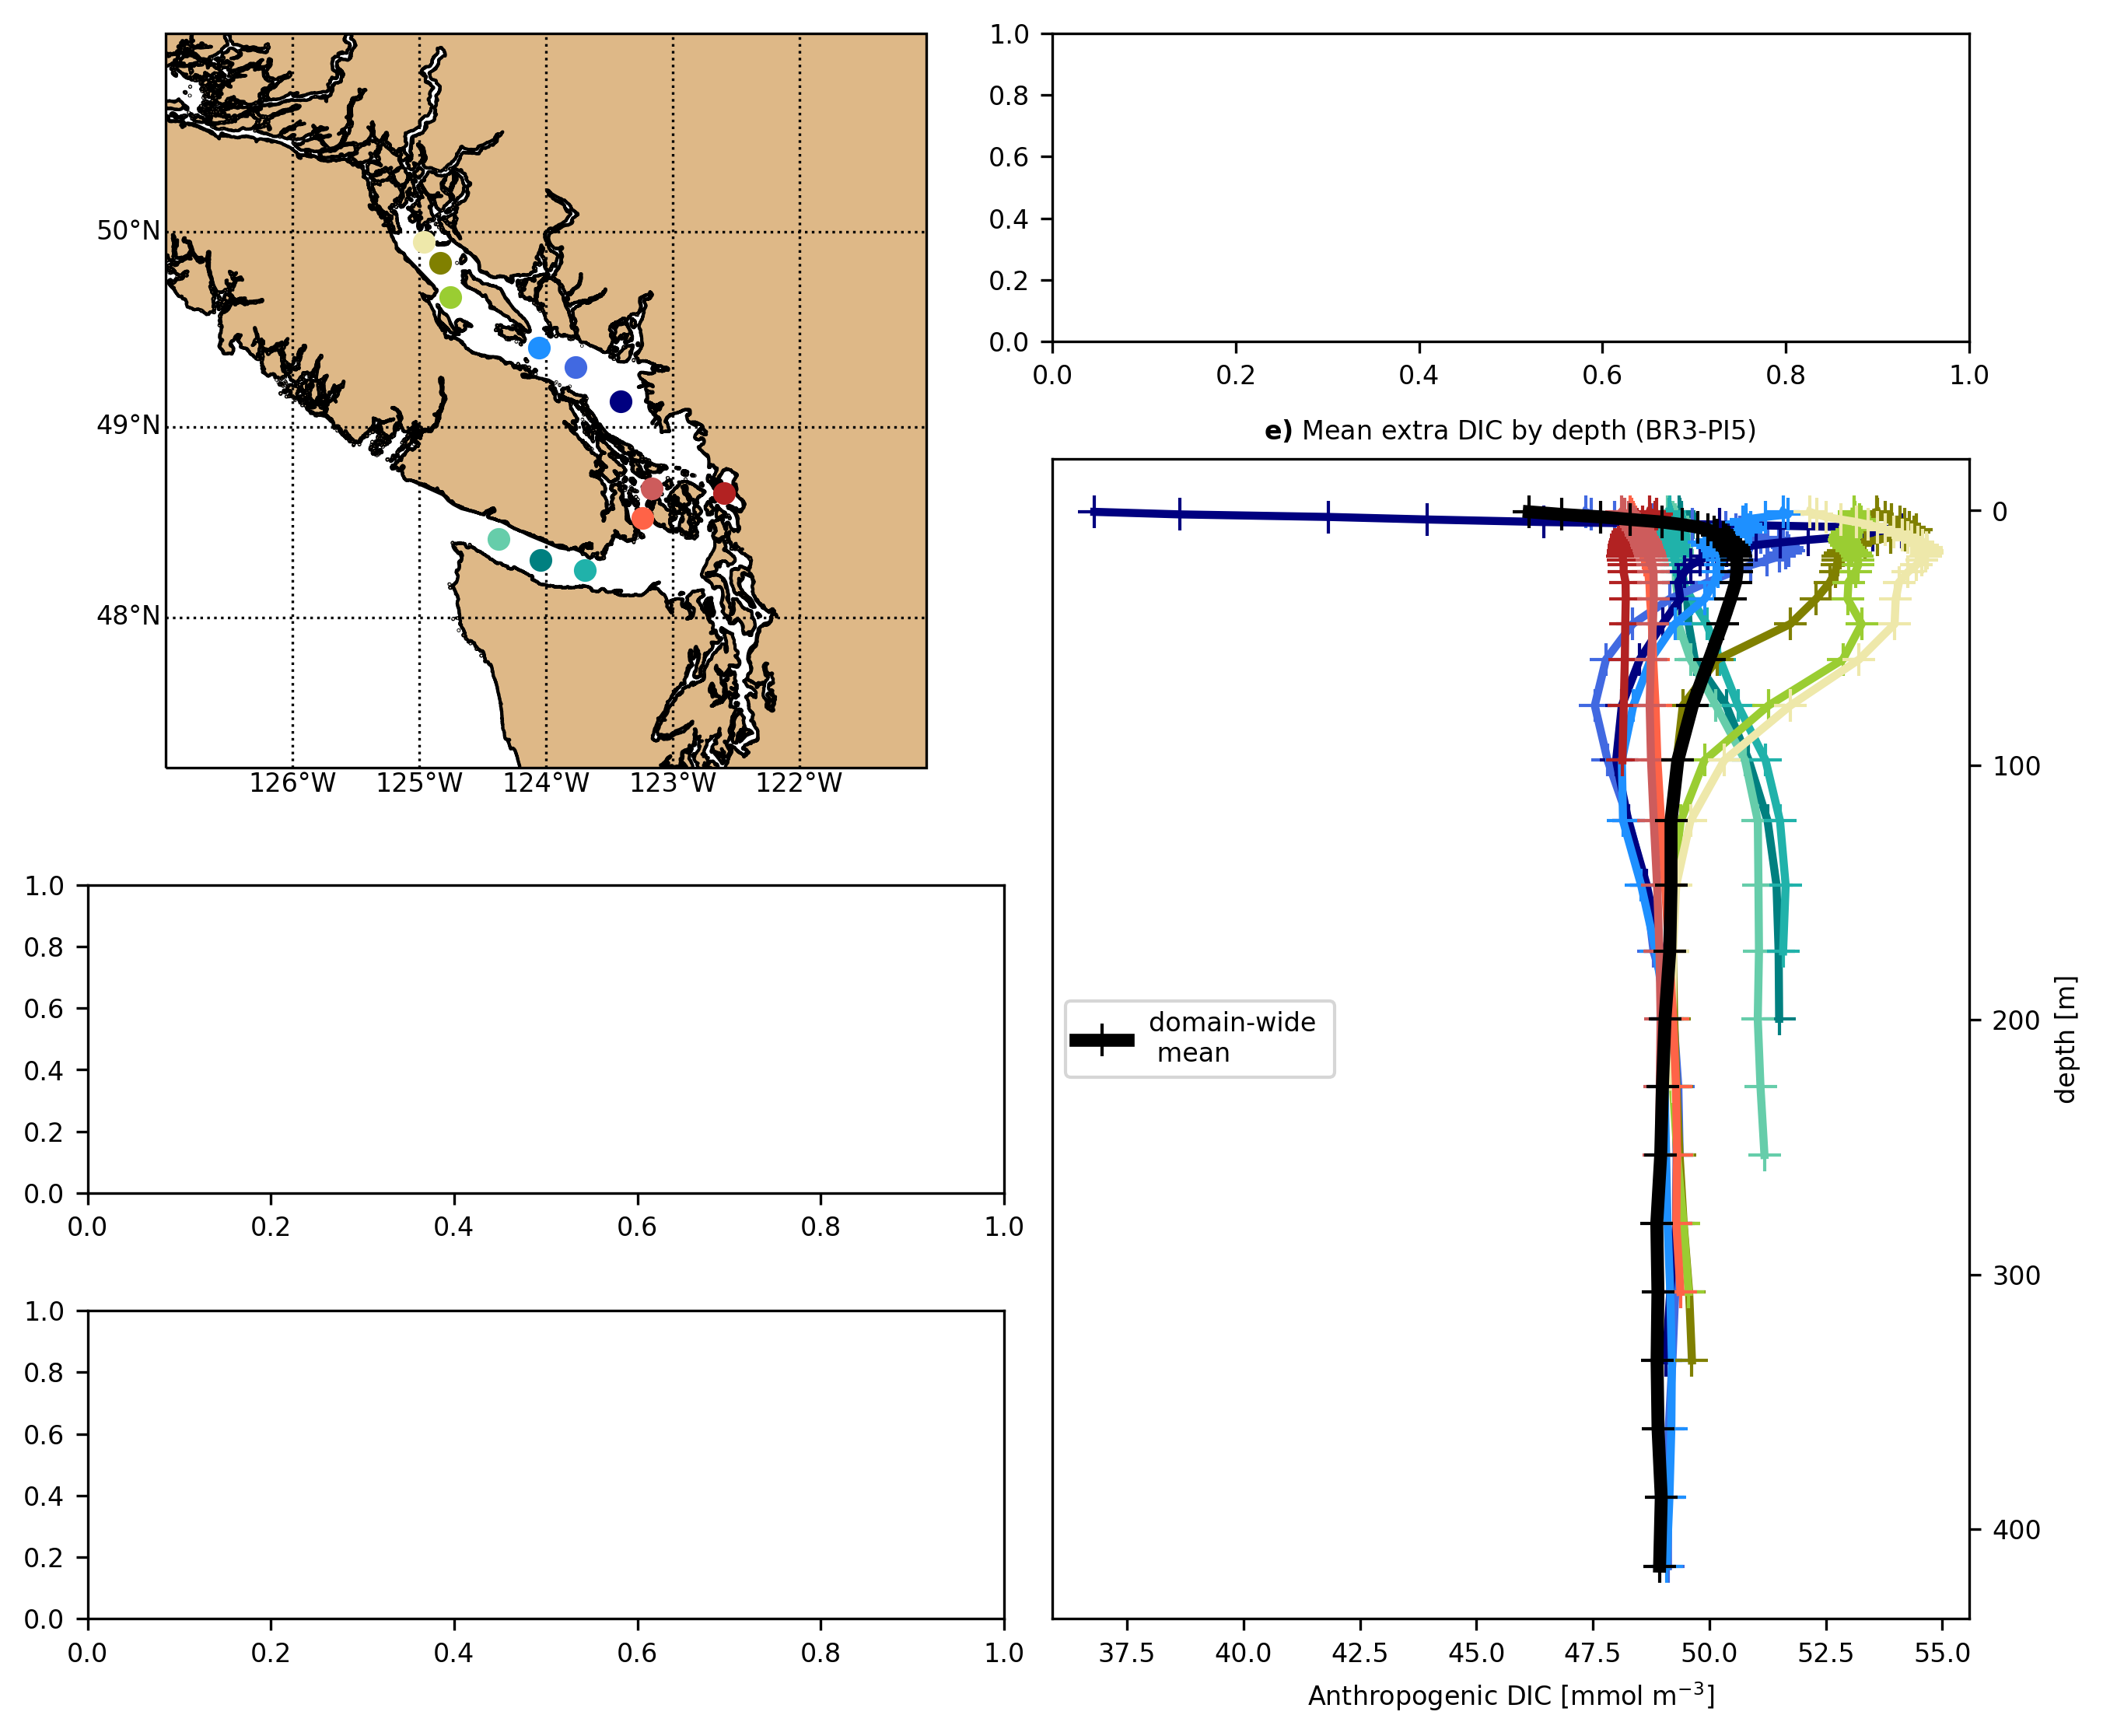

In [21]:
ms = 6

tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rcParams['font.size'] = 8

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

############# ax1 
#domain plot - BR run summer average
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
xlim, ylim = [-128, -121.5], [47.2, 51.0]
ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

#Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

#ax.plot(-124,50, marker = 'o', markersize = 68, color = 'teal', zorder = 10)

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)
    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())
#ax.plot(-124,50, 'bo', markersize=7, transform=ccrs.Geodetic())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.7, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='mean summer salinity [g/kg]', ticks = tticks)




# # Draw coastline
# ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

# #Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# # Add gridlines
# xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
# gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
# gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.6, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='Depth [m]', ticks = tticks)

#############################




ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
# depth = tmesh['e3t_0'][0,:,250,250]; shift = 2; seg = 45; lw = 1
# tcm = cm.dense
# depths = tmesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
#     td = zdepths[i]
#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(td))+' m', linewidth = lw+1)
# #ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(bbox_to_anchor=[1, 1.1], fontsize = 8, ncol = 1)
# plt.xlim([0,365*1])
# plt.ylim([1440,2180])
# plt.grid()
# #ax1.set_xlabel('day of year', fontsize = 8)
# ax1.set_xticks([0,50,100,150,200,250,300,350])
# ax1.set_ylabel('mmol m$^{-3}$', fontsize = 8)
# #ax1.set_title(r'$\bf{a)}$ Model domain showing analyzed stations',y=1.1)
# ax1.set_title(r'$\bf{b)}$ By-layer domain mean DIC concentration', fontsize = 8)

#bio, river
ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 2, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 2)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs); ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('mmol N m$^{-2}$', fontsize = fs); ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('m$^3$ s$^{-1}$', fontsize = fs)
# ax2.set_xticks([0,50,100,150,200,250,300,350])
# plt.xlim([0,365]); ax2b.set_ylim([0,130])
# ax2.set_title(r'$\bf{c)}$ Freshwater discharge and phytoplankton biomass', fontsize = 8)

### thalweg
ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)
# cbar = \
# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(1900, 2200, 20), cmap = cm.matter)
# ax3.set_title(r'$\bf{d)}$ Year Average DIC (present-day)',fontsize = 8)
# ax3.set_xlabel('Distance along thalweg [km]',fontsize = 8)
# cbar.ax.tick_params(labelsize=8) 
# cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = 8)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# #ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
# ax3.tick_params(axis='both', which='major', labelsize=8)
# ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')

# depth profile
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

ax3.plot(BR3_jdf_dp-PI5_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI5_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI5_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI5_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI5_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI5_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI5_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI5_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI5_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI5_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI5_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI5_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI5_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

#ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (BR3-PI5) ', fontsize = 8)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'center left', fontsize = fs)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
plt.tight_layout()
fig.savefig('MF_DOMAIN_BR3-PI5.jpg')
# 

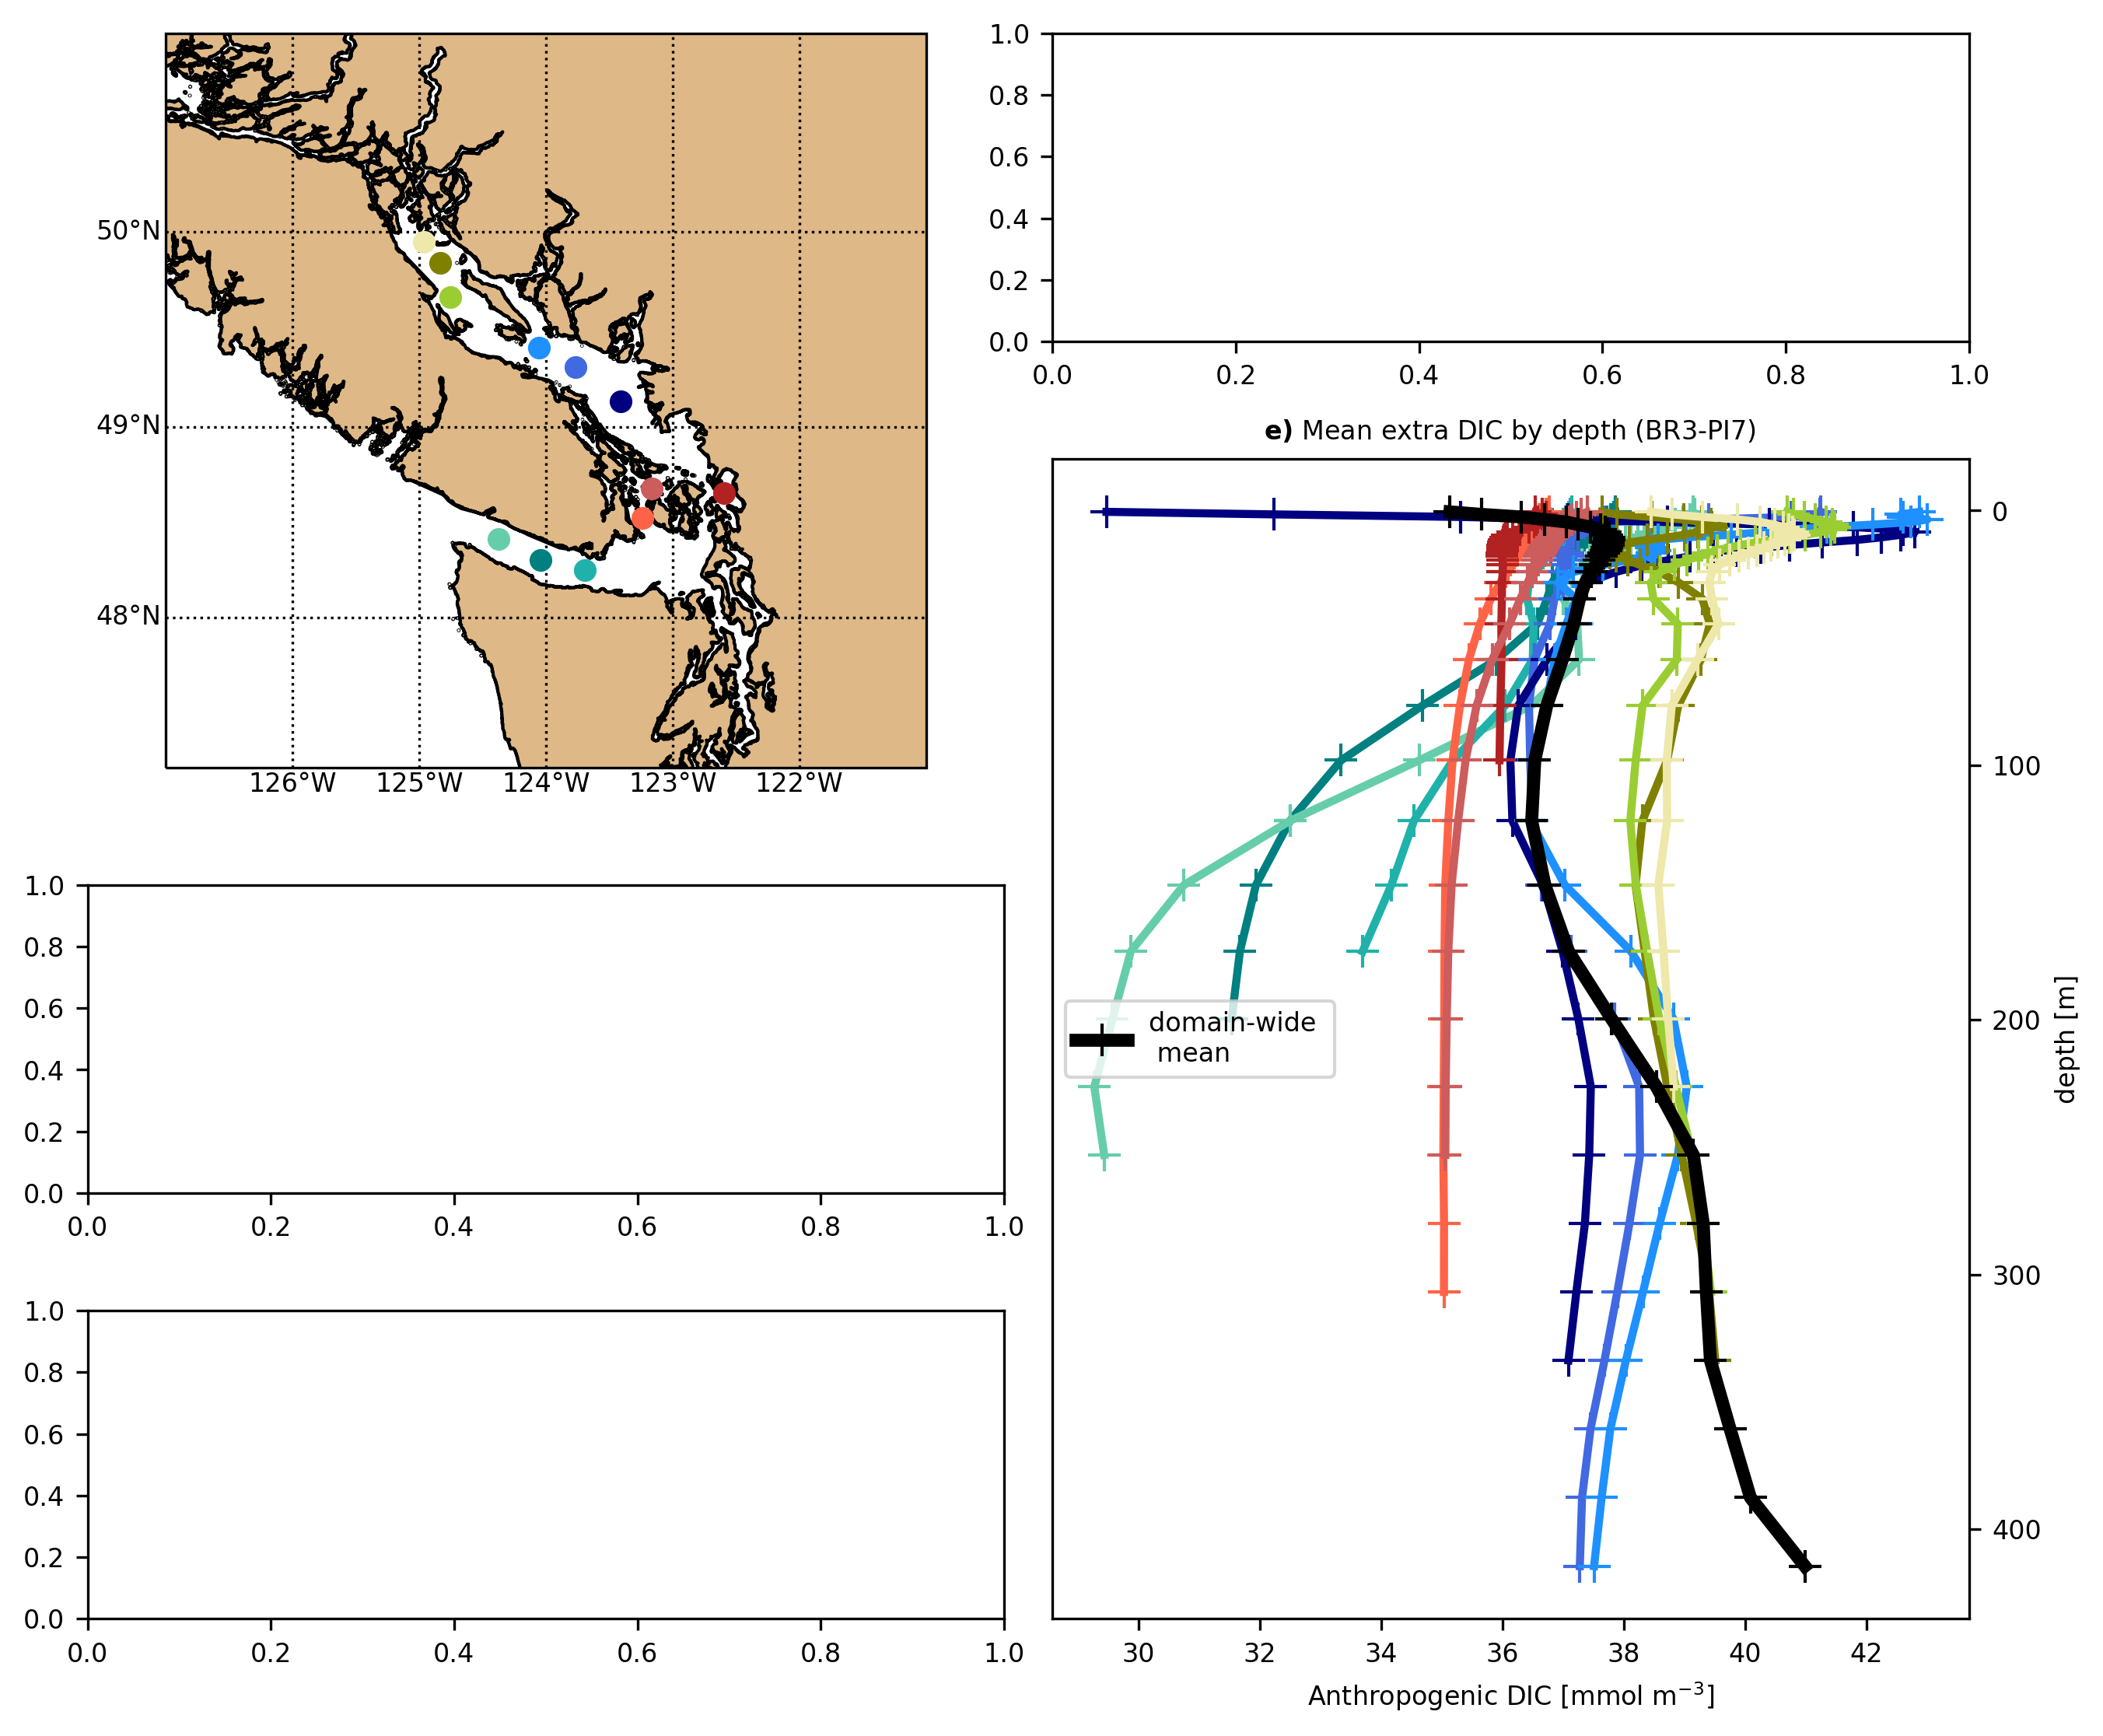

In [22]:
ms = 6

tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fact = 1/72; fs = 8
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rcParams['font.size'] = 8

#plt.rcParams["font.family"] = "cursive"
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

fig = plt.figure(figsize=(23/2.54, 19/2.54),dpi = 300)
gs = fig.add_gridspec(4, 4)

#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

############# ax1 
#domain plot - BR run summer average
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask201702.nc')
xlim, ylim = [-128, -121.5], [47.2, 51.0]
ax = fig.add_subplot(gs[0:2, 0:2], projection=crs.Mercator(central_longitude=-124))
ax.set_extent([-127, -121, 47.2, 51.0], crs=crs.PlateCarree())

# Draw coastline
ax.coastlines()
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

#Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

#ax.plot(-124,50, marker = 'o', markersize = 68, color = 'teal', zorder = 10)

for i in range(0, len(xs_list)):
    tx = xs_list[i]; ty = ys_list[i]
    tlon = nav_lon[ty,tx]; tlat = nav_lat[ty,tx]
#     print(tlon)
#     print(tlat)
    w =ax.plot(tlon,tlat,marker = 'o', color = cols_list[i], markersize=ms, transform=crs.Geodetic())
#ax.plot(-124,50, 'bo', markersize=7, transform=ccrs.Geodetic())

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
#gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.7, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='mean summer salinity [g/kg]', ticks = tticks)




# # Draw coastline
# ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# tdat_p = BR3_sal_summer[0,:,:]
# # Overlay bathymetry
# c = ax.contourf(
#     grid.nav_lon, grid.nav_lat, tdat_p, levels=np.arange(0, 33.0, 0.25), 
#     cmap=cm.haline, extend = 'both', transform=crs.PlateCarree(), zorder=2,
# )

# #Overlay domain landmask and coastline
# for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
#     getattr(ax, attr)(
#         grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
#         levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
#     )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# # Add gridlines
# xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
# gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
# gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
# gl.xlabels_top, gl.ylabels_right = False, False

# cax = fig.add_axes([0.6, 0.30, 0.015, 0.6])
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# fig.colorbar(c, cax=cax, orientation='vertical', label='Depth [m]', ticks = tticks)

#############################




ax1 = plt.subplot2grid((4,4), (2,0), colspan=2, rowspan=1) 
# depth = tmesh['e3t_0'][0,:,250,250]; shift = 2; seg = 45; lw = 1
# tcm = cm.dense
# depths = tmesh['gdept_1d'][:]
# zdepths = depths[0]
# for i in range(0,40):
#     td = zdepths[i]
#     ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg), linewidth = lw)
    
#     if ((i == 0) | (i == 10) | (i==19) | (i == 24)\
#         | (i == 27) | (i == 35 ) ) :
#         ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i+shift)/seg),\
#                 label = str(int(td))+' m', linewidth = lw+1)
# #ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
# ax1.legend(bbox_to_anchor=[1, 1.1], fontsize = 8, ncol = 1)
# plt.xlim([0,365*1])
# plt.ylim([1440,2180])
# plt.grid()
# #ax1.set_xlabel('day of year', fontsize = 8)
# ax1.set_xticks([0,50,100,150,200,250,300,350])
# ax1.set_ylabel('mmol m$^{-3}$', fontsize = 8)
# #ax1.set_title(r'$\bf{a)}$ Model domain showing analyzed stations',y=1.1)
# ax1.set_title(r'$\bf{b)}$ By-layer domain mean DIC concentration', fontsize = 8)

#bio, river
ax2 = plt.subplot2grid((4,4), (3,0), colspan=2, rowspan=1) 
# ax2b =ax2.twinx()
# ax2.plot(days_in,Fraser_discharge,'-k', linewidth = 2, label = 'Fraser river discharge')
# ax2.grid()
# ax2b.plot(days_in, flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2,\
#           color = 'darkseagreen', label = 'phytoplankton biomass', linewidth = 2)
# ax2b.fill_between(days_in, np.zeros_like(flag_mas_mm_m2), (flag_mas_mm_m2+cili_mas_mm_m2+diat_mas_mm_m2), \
#                  color = 'darkseagreen', alpha = 0.2 )

# ax2b.legend(loc = 'lower center', fontsize = fs); ax2.legend(loc = 'upper right', fontsize = fs)
# ax2b.set_ylabel('mmol N m$^{-2}$', fontsize = fs); ax2.set_xlabel('day of year', fontsize = fs)
# ax2.set_ylabel('m$^3$ s$^{-1}$', fontsize = fs)
# ax2.set_xticks([0,50,100,150,200,250,300,350])
# plt.xlim([0,365]); ax2b.set_ylim([0,130])
# ax2.set_title(r'$\bf{c)}$ Freshwater discharge and phytoplankton biomass', fontsize = 8)

### thalweg
ax3 = plt.subplot2grid((4,4), (0,2), colspan=2, rowspan=1)
# cbar = \
# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(1900, 2200, 20), cmap = cm.matter)
# ax3.set_title(r'$\bf{d)}$ Year Average DIC (present-day)',fontsize = 8)
# ax3.set_xlabel('Distance along thalweg [km]',fontsize = 8)
# cbar.ax.tick_params(labelsize=8) 
# cbar.set_label('DIC [mmol m$^{-3}$]', fontsize = 8)
# ax3.tick_params(axis='both', which='major', labelsize=fs)
# #ax3.text(0.03, 0.03, 'd)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')
# ax3.tick_params(axis='both', which='major', labelsize=8)
# ax3.text(0.15, 0.11, 'Ocean \n Exchange', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax3.text(0.875, 0.11, 'Northern \n Fjord', transform=ax3.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')

# depth profile
ax3 = plt.subplot2grid((4,4), (1,2), colspan=2, rowspan=3) 

ax3.plot(BR3_jdf_dp-PI7_jdf_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf2_dp-PI7_jdf2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf2_col, markersize = 10)# label = 'JdF mean')
ax3.plot(BR3_jdf3_dp-PI7_jdf3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = jdf3_col, markersize = 10)# label = 'JdF mean')

ax3.plot(BR3_cs_dp-PI7_cs_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs2_dp-PI7_cs2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs2_col, markersize = 10)# label = 'cs mean')
ax3.plot(BR3_cs3_dp-PI7_cs3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = cs3_col, markersize = 10)# label = 'cs mean')

ax3.plot(BR3_ns_dp-PI7_ns_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns2_dp-PI7_ns2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns2_col, markersize = 10)# label = 'ns mean')
ax3.plot(BR3_ns3_dp-PI7_ns3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = ns3_col, markersize = 10)# label = 'ns mean')

ax3.plot(BR3_haro_dp-PI7_haro_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro2_dp-PI7_haro2_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro2_col, markersize = 10)# label = 'haro mean')
ax3.plot(BR3_haro3_dp-PI7_haro3_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 2.5, color = haro3_col, markersize = 10)# label = 'haro mean')

ax3.plot(BR3_dp-PI7_dp,zdepth, marker = '+', \
         linestyle = '-', linewidth = 4, color = 'k',\
         markersize = 10, label = 'domain-wide \n mean')

#ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (present-day - preindustrial) ', fontsize = 8)
ax3.set_title(r'$\bf{e)}$ Mean extra DIC by depth (BR3-PI7) ', fontsize = 8)
ax3.invert_yaxis()
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.legend(loc = 'center left', fontsize = fs)
ax3.set_xlabel('Anthropogenic DIC [mmol m$^{-3}$]', fontsize = fs)
ax3.set_ylabel('depth [m]', fontsize = fs)
plt.tight_layout()
fig.savefig('MF_DOMAIN_BR3-PI7.jpg')
# 

## calculate full year mean

In [8]:

# start ='2015-01-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_summer1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     tstr = glob.glob('//data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG*carp*'+ymd+'*.nc')
#     tnc = tstr[0]
#     tn = nc.Dataset(tnc)
#     t_dic = tn['dissolved_inorganic_carbon'][0,:,:,:]
#     BR_oma_summer1[i,:,:,:] = t_dic


# print(np.shape(BR_oma_summer1))
# BR_oma_summer_mean = np.nanmean(BR_oma_summer1,axis=0)
# pickle.dump(BR_oma_summer_mean, open("../pkls/BR3_DIC_fullyear_mean.pkl", 'wb'))

# OLD basemap-based code for how to make domain plot


In [9]:

# fa = 0.15
# w_map = [-127+fa, -121-fa, 47+fa, 51.0-fa]
# m = plot_basemap(ax1, w_map, zorder=[0, 1, 7]) #offset=[-30000, -15000]
# x, y = m(grid['nav_lon'].values, grid['nav_lat'].values)  

# #define data to plot as the surface level of the summer dataset
# tdat_p = BR3_sal_summer[0,:,:]
# mesh = ax1.contourf(x, y, tdat_p, levels=np.arange(0, 33.0, 0.25), \
#                  cmap=cm.haline, extend = 'both') # extend='both', zorder=.2)

# ax1.contourf(x, y, grid['Bathymetry'], [-0.01, 0.01], colors='lightgray', zorder=3)
# ax1.contour( x, y, grid['Bathymetry'], [0], colors='Black', zorder=4)

# ax1.scatter(x[jdf_y,jdf_x],y[jdf_y,jdf_x], marker = 'o', edgecolor = 'k', s = 68, color = 'teal', zorder = 10)
# ax1.scatter(x[jdf2_y,jdf2_x],y[jdf2_y,jdf2_x], marker = 'o', edgecolor = 'k',s = 68, color = 'mediumaquamarine', zorder = 10)
# ax1.scatter(x[jdf3_y,jdf3_x],y[jdf3_y,jdf3_x], marker = 'o', edgecolor = 'k',s = 68, color = 'lightseagreen', zorder = 10)
# ax1.scatter(x[cs_y,cs_x],y[cs_y,cs_x], marker = 'o', s = 68, edgecolor = 'k',color = 'royalblue', zorder = 10)
# ax1.scatter(x[cs2_y,cs2_x],y[cs2_y,cs2_x], marker = 'o', s = 68, edgecolor = 'k',color = 'navy', zorder = 10)
# ax1.scatter(x[cs3_y,cs3_x],y[cs3_y,cs3_x], marker = 'o', s = 68, edgecolor = 'k',color = 'dodgerblue', zorder = 10)
# ax1.scatter(x[ns_y,ns_x],y[ns_y,ns_x], marker = 'o', s = 68, edgecolor = 'k',color = 'olive', zorder = 10)
# ax1.scatter(x[ns2_y,ns2_x],y[ns2_y,ns2_x], marker = 'o', s = 68, edgecolor = 'k',color = 'yellowgreen', zorder = 10)
# ax1.scatter(x[ns3_y,ns3_x],y[ns3_y,ns3_x], marker = 'o', s = 68, edgecolor = 'k',color = 'palegoldenrod', zorder = 10)
# ax1.scatter(x[haro_y,haro_x],y[haro_y,haro_x], marker = 'o', s = 68, edgecolor = 'k',color = 'tomato', zorder = 10)
# ax1.scatter(x[haro2_y,haro2_x],y[haro2_y,haro2_x], marker = 'o', s = 68, edgecolor = 'k',color = 'firebrick', zorder = 10)
# ax1.scatter(x[haro3_y,haro3_x],y[haro3_y,haro3_x], marker = 'o', s = 68, edgecolor = 'k', color = 'indianred', zorder = 10)

# plot_thalweg(ax1, x, y)
# tticks = [0,2.5,5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5]
# cbar = fig.colorbar(mesh, ax=ax1, orientation = 'vertical',fraction=0.1, pad=0.0, ticks = tticks)
# cbar.set_label(label='mean summer salinity [g/kg]', size=fs)
# # ax1.set_title('r\textbf{(a)}'+'By-layer domain')
# #ax1.set_title(r'non-bold part of title, $\bf{{{a}}}$ still less bold'.format(a='a)' ),y=1.1)
# ax1.set_title(r'$\bf{a)}$ Model domain showing analyzed stations',fontsize = 8, y=1.1)


# #text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=8, fontweight='bold', ha ='center', va='bottom')

# ax1.text(0.45, 0.16, 'Ocean \n Exchange', transform=ax1.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax1.text(0.88, 0.34, 'Tidal \n Mixing', transform=ax1.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax1.text(0.22, 0.65, 'Northern \n Fjord', transform=ax1.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
# ax1.text(0.425, 0.43, 'Freshwater \n Influenced', transform=ax1.transAxes, \
#          fontsize=8, fontweight='bold', ha ='center', va='bottom')
#ax1.text(0.03, 0.03, 'c)', transform=ax3.transAxes, fontsize=8, fontweight='bold', va='bottom')

#by layer